# Задача классификации рукописных арабских цифр
## _С помощью нейронных сетей_

In [1]:
import numpy
import time
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.metrics

import math

import tensorflow

from keras.models import Sequential
from keras.layers import Dense

%matplotlib inline

Using TensorFlow backend.


## 1. Загрузка данных

In [2]:
digits = sklearn.datasets.load_digits()

In [3]:
len(digits['data']), len(digits['data'][0]), min([min(v) for v in digits['data']]), max([max(v) for v in digits['data']])

(1797, 64, 0.0, 16.0)

In [4]:
digits['target'], sorted(set(digits['target'])), len(digits['target'])

(array([0, 1, 2, ..., 8, 9, 8]), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 1797)

Итак, в размеченном наборе данных всего 1797 цифр, каждая представлена одномерным массивом из 64 элементов (8x8 пикселей).
Так они выглядят (первые 50 изображений).

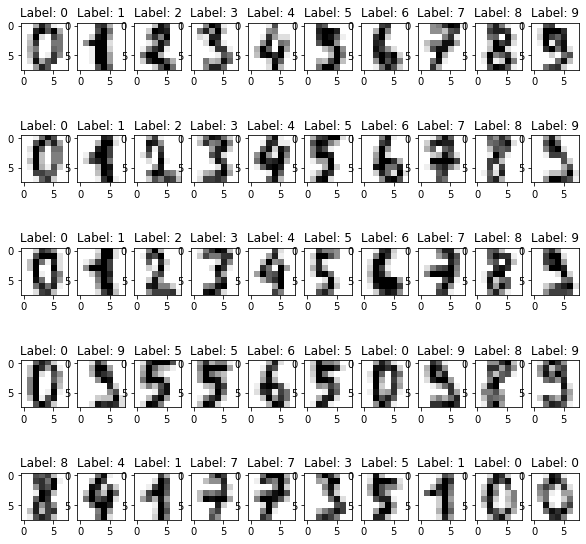

In [5]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Label: {digits["target"][i]}')

## 2. Подготовим входной набор данных - тренировочных и тестовых

In [106]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits['data'], digits['target'], train_size=0.75)

In [107]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1347, 64), (1347,), (450, 64), (450,))

In [108]:
x_train.ndim, y_train.ndim, x_test.ndim, y_test.ndim

(2, 1, 2, 1)

Нормализуем данные

In [109]:
x_train = x_train.astype('float32') / 16.0
x_test = x_test.astype('float32') / 16.0

In [110]:
x_train.shape, y_train.shape

((1347, 64), (1347,))

In [111]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## 3. Создаем самую простую нейронную сеть прямого распространения с обычными связанными слоями

In [114]:
from keras import losses
from keras import optimizers
from keras import metrics
from keras import activations
from keras import callbacks

model = Sequential()

model.add(Dense(64, input_shape=(64,), activation=activations.relu))
model.add(Dense(10, activation=activations.softmax))

model.compile(loss=losses.categorical_crossentropy, optimizer=optimizers.adam(0.05), metrics=[metrics.categorical_accuracy,])

print(model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_43 (Dense)             (None, 10)                650       
Total params: 4,810
Trainable params: 4,810
Non-trainable params: 0
_________________________________________________________________
None


## 4. Тренируем сеть

In [115]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping,])

Train on 1347 samples, validate on 450 samples
Epoch 1/50
1347/1347 [==============================] - 0s 164us/step - loss: 1.1455 - categorical_accuracy: 0.6281 - val_loss: 0.4712 - val_categorical_accuracy: 0.8489
Epoch 2/50
1347/1347 [==============================] - 0s 34us/step - loss: 0.3137 - categorical_accuracy: 0.8901 - val_loss: 0.3189 - val_categorical_accuracy: 0.9067
Epoch 3/50
1347/1347 [==============================] - 0s 32us/step - loss: 0.1483 - categorical_accuracy: 0.9503 - val_loss: 0.2377 - val_categorical_accuracy: 0.9333
Epoch 4/50
1347/1347 [==============================] - 0s 36us/step - loss: 0.0880 - categorical_accuracy: 0.9710 - val_loss: 0.1964 - val_categorical_accuracy: 0.9489
Epoch 5/50
1347/1347 [==============================] - 0s 32us/step - loss: 0.0557 - categorical_accuracy: 0.9866 - val_loss: 0.1987 - val_categorical_accuracy: 0.9422
Epoch 6/50
1347/1347 [==============================] - 0s 31us/step - loss: 0.0443 - categorical_accuracy:

In [116]:
history.history.keys()

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])

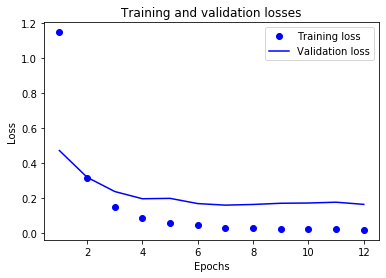

In [117]:
model_history = history.history

model_loss_values = model_history['loss']
validation_loss_values = model_history['val_loss']
epochs = range(1, len(model_history['val_loss']) + 1)

plt.plot(epochs, model_loss_values, 'bo', label='Training loss')
plt.plot(epochs, validation_loss_values, 'b', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

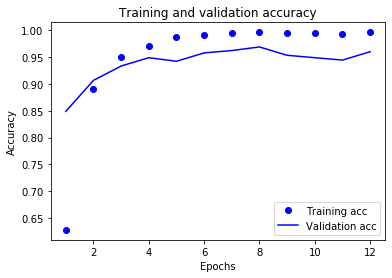

In [118]:
acc_values = model_history['categorical_accuracy']
validation_acc_values = model_history['val_categorical_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, validation_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [119]:
model.evaluate(x_test, y_test)

450/450 [==============================] - 0s 90us/step


[0.1644137087301351, 0.9599999785423279]

## 5. Тестовая картинка

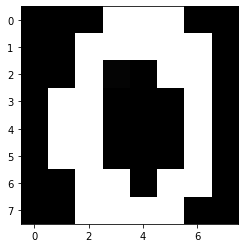

In [30]:
img = plt.imread('0_small.png')
plt.imshow(img, cmap='gray')

In [31]:
len(img), len(img[0]), len(img[0][0])

(8, 8, 3)

Видно, что загруженная PNG картинка устроена по-другому, не так как тестовый набор digits в sklearn: это двумерный массив 8x8, каждый элемент которого это RGB-тройка, причем компоненты RGB - это числа с плавающей точкой от 0 до 1. А sklearn.datasets.load_digits() возвращает пиксели как число от 0 до 16 (http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Таким образом, нам надо свернуть (R,G,B) в одно число с максимальным значением 1.0:

In [32]:
transformed_img = list()
for line in img:
    for pixel in line:
        com_r = pixel[0]
        com_g = pixel[1]
        com_b = pixel[2]
        transformed_img.append(int(math.sqrt(com_r**2 + com_g**2 + com_b**2) * 16 / math.sqrt(3)))
transformed_img = numpy.array(transformed_img).astype('float32') / 16.0
transformed_img

array([0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.], dtype=float32)

In [120]:
[round(x, 3) for x in model.predict(numpy.array([transformed_img]))[0]]

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Таким образом, это - __0__.

Проверим на тренировочном и тестовом наборах:

In [68]:
model.predict(numpy.array([x_train[0]])), y_train[0]

(array([[1.0949005e-15, 5.0849163e-13, 2.6901221e-09, 4.2275420e-05,
         1.0223816e-18, 2.8768136e-13, 6.2390313e-16, 2.2101165e-14,
         1.8601380e-08, 9.9995768e-01]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

In [27]:
model.predict(numpy.array([x_test[11]])), y_test[11]

(array([[0.03084951, 0.042814  , 0.08064907, 0.04571362, 0.03104047,
         0.5466498 , 0.03396732, 0.11548952, 0.05732729, 0.01549942]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [121]:
model.save('digits.h5')